# Importing Librabries 

Python data reader is used to read the data off the internet

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ADITYA\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# Using stocks of 5 major comapnies in Indian Sensex Index.

1. Mahindra and Mahindra
2. ICICI Bank
3. Infosys
4. IOCL(Indian Oil Corporation Limited)
5. Dr Reddy pharmaceuticals

In [4]:
assets = ['M&M.NS','ICICIBANK.NS','INFY.NS','IOC.NS','DRREDDY.NS']
pf1 = pd.DataFrame()

for a in assets:
    pf1[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

# Basic EDA and plotting to see how the data actually looks.

In [5]:
pf1

,M&M.NS,ICICIBANK.NS,INFY.NS,IOC.NS,DRREDDY.NS
Date,,,,,
2010-01-04,226.646637,85.319977,129.378204,26.569504,1047.040039
2010-01-05,230.819916,86.130264,129.811600,26.670839,1079.400391
2010-01-06,236.355637,86.789574,127.917488,26.632839,1107.085571
2010-01-07,231.852585,85.970222,125.042534,26.214857,1089.942627
2010-01-08,231.872665,84.762535,122.029282,26.662392,1094.663696
...,...,...,...,...,...
2020-04-30,366.649994,380.149994,715.500000,84.199997,3936.300049
2020-05-04,357.049988,338.049988,673.700012,79.750000,3939.000000
2020-05-05,368.149994,330.850006,673.700012,78.699997,3833.899902


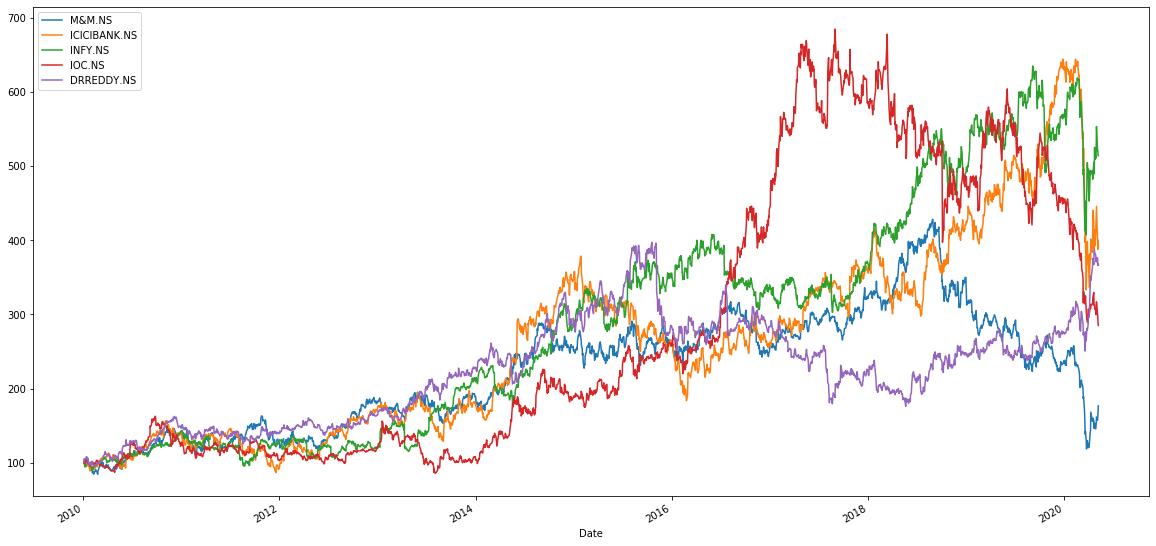

In [6]:
(pf1/pf1.iloc[0] *100).plot(figsize=(20,10))
plt.savefig('stocks1f.jpg')

# Calculating Logarthimitic Returns for the shares

 *Then calculating the correlation and covariance which is to be further used to calculate portfolio risks and Securities*

In [7]:
log_return=np.log(pf1/pf1.shift(1))

In [8]:
log_return.mean()*250

M&M.NS          0.055962
ICICIBANK.NS    0.134866
INFY.NS         0.160803
IOC.NS          0.102915
DRREDDY.NS      0.127593
dtype: float64

In [9]:
log_return.cov()

,M&M.NS,ICICIBANK.NS,INFY.NS,IOC.NS,DRREDDY.NS
M&M.NS,0.000359,0.000177,0.000065,0.000094,0.000060
ICICIBANK.NS,0.000177,0.000470,0.000096,0.000130,0.000071
INFY.NS,0.000065,0.000096,0.000332,0.000023,0.000049
IOC.NS,0.000094,0.000130,0.000023,0.000426,0.000033
DRREDDY.NS,0.000060,0.000071,0.000049,0.000033,0.000283


In [10]:
log_return.corr()

,M&M.NS,ICICIBANK.NS,INFY.NS,IOC.NS,DRREDDY.NS
M&M.NS,1.000000,0.430931,0.188415,0.239397,0.188001
ICICIBANK.NS,0.430931,1.000000,0.243713,0.289655,0.193351
INFY.NS,0.188415,0.243713,1.000000,0.061966,0.161194
IOC.NS,0.239397,0.289655,0.061966,1.000000,0.093906
DRREDDY.NS,0.188001,0.193351,0.161194,0.093906,1.000000


# Calculating the random weights which are to be used in monte carlo simulations

In [11]:
# Expected Retruns

#Calculating the weights first

num=5 # number of shares in consideration
weights = np.random.random(num)
weights /= np.sum(weights)
weights

#returns

np.sum(weights * log_return.mean())*250

0.11260838077387274

# Calculating the portfolio variance 

*250 are the number of trading days in an year*

In [12]:
# Portfolio Variance

np.dot(weights.T, np.dot(log_return.cov() * 250, weights))  

0.036074463510642536

In [13]:
#Portfolio Volatility

np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 250, weights)))

0.18993278682376705

*This is just calculating the variance of portfolio variance, volatilities and the sharpe ratio. Refer to readme file links to know more about sharpe ratio*

In [14]:
pfolio_returns = []
pfolio_volatilities = []
sharpe = []
risk_free_r=0.0647
weightage=[]
for x in range (10000):
    weights = np.random.random(num)
    weights /= np.sum(weights)
    weightage.append(weights)
    pfolio_returns.append(np.sum(weights * log_return.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_return.cov() * 250, weights))))
    temp=((pfolio_returns[x]-risk_free_r)/pfolio_volatilities[x])
    sharpe.append(temp)
    
    
pfolio_returns = np.array(pfolio_returns)  #Converrting list to numpy array.
pfolio_volatilities = np.array(pfolio_volatilities)
sharpe_ratio = np.array(sharpe)

pfolio_returns, pfolio_volatilities, sharpe_ratio # Each array has 10000 values.

(array([0.13227685, 0.13075324, 0.12522209, ..., 0.11722163, 0.1192764 ,
        0.1118488 ]),
 array([0.18440708, 0.19038715, 0.18743235, ..., 0.19527383, 0.18528462,
        0.18827545]),
 array([0.36645477, 0.34694169, 0.32290099, ..., 0.26896401, 0.29455442,
        0.25042458]))

In [15]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

The weightages for each stock cosnidering Maximum sharpe ratio:


                           M&M.NS  ICICIBANK.NS   INFY.NS    IOC.NS  DRREDDY.NS
Weightages of Each one  0.002895      0.109337  0.445775  0.123326    0.318666


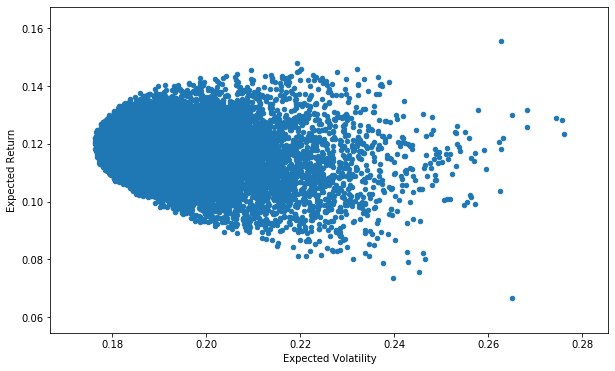

In [20]:
final_pf=pd.DataFrame(weightage[np.argmax(sharpe_ratio)], index=['M&M.NS','ICICIBANK.NS','INFY.NS','IOC.NS','DRREDDY.NS'], columns=['Weightages of Each one'])

print('The weightages for each stock cosnidering Maximum sharpe ratio:\n\n\n',final_pf.T)

portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.savefig('stocks2f.jpg')

*Let me briefly explain what below function is doing. First, it generates random portfolio and gets the results (portfolio returns, portfolio volatility, portfolio Sharpe ratio) and weights for the corresponding result. Then by locating the one with the highest Sharpe ratio portfolio, it displays maximum Sharpe ratio portfolio as red star sign. And does similar steps for minimum volatility portfolio, and displays it as the yellow star on the plot. All the randomly generated portfolios will be also plotted with colour map applied to them based on the Sharpe ratio. The bluer, the higher Sharpe ratio.*

The weightages for each stock cosnidering Maximum sharpe ratio:


                           M&M.NS  ICICIBANK.NS   INFY.NS    IOC.NS  DRREDDY.NS
Weightages of Each one  0.002895      0.109337  0.445775  0.123326    0.318666


The weightages for each stock cosnidering Minimum sharpe ratio(Minimum Volatility):


                           M&M.NS  ICICIBANK.NS   INFY.NS   IOC.NS  DRREDDY.NS
Weightages of Each one  0.832126      0.011192  0.036928  0.11332    0.006435


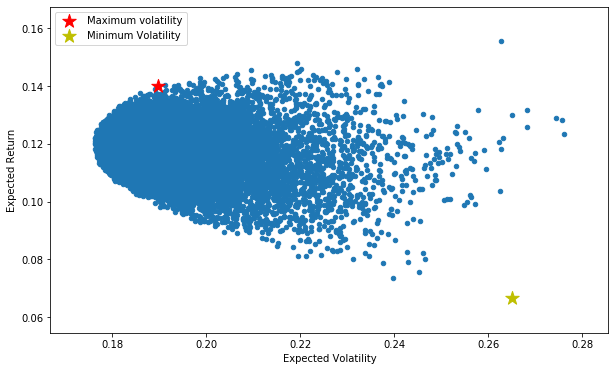

In [21]:
final_pf=pd.DataFrame(weightage[np.argmax(sharpe_ratio)], index=['M&M.NS','ICICIBANK.NS','INFY.NS','IOC.NS','DRREDDY.NS'], columns=['Weightages of Each one'])
final_pf1=pd.DataFrame(weightage[np.argmin(sharpe_ratio)], index=['M&M.NS','ICICIBANK.NS','INFY.NS','IOC.NS','DRREDDY.NS'], columns=['Weightages of Each one'])

print('The weightages for each stock cosnidering Maximum sharpe ratio:\n\n\n',final_pf.T)
print("\n\nThe weightages for each stock cosnidering Minimum sharpe ratio(Minimum Volatility):\n\n\n",final_pf1.T)
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6))
plt.scatter(pfolio_volatilities[np.argmax(sharpe_ratio)],pfolio_returns[np.argmax(sharpe_ratio)],marker='*',color='r',s=200, label='Maximum volatility')
plt.scatter(pfolio_volatilities[np.argmin(sharpe_ratio)],pfolio_returns[np.argmin(sharpe_ratio)],marker='*',color='y',s=200, label='Minimum Volatility')
plt.xlabel('Expected Volatility')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.legend()  
plt.savefig('stocks3f.jpg')